In [1]:
# import os
# import subprocess

# def has_nvidia_gpu():
#     try:
#         # Ask the NVIDIA driver to list all GPUs
#         res = subprocess.run(
#             ["nvidia-smi", "-L"],
#             stdout=subprocess.PIPE,
#             stderr=subprocess.DEVNULL,
#             check=True,
#             text=True
#         )
#         # If any lines returned, we’ve got at least one GPU
#         return bool(res.stdout.strip())
#     except (subprocess.CalledProcessError, FileNotFoundError):
#         # Either nvidia-smi failed or isn’t installed → no NVIDIA GPU visible
#         return False

# if has_nvidia_gpu():
#     print("GPU detected: you can use the CUDA jaxlib.")
# else:
#     os.environ["JAX_PLATFORMS"] = "cpu"
#     print("No GPU detected: forcing CPU-only JAX.")

In [2]:
# ─── Cell 1: clean /tmp AND redirect future tmps into RAM ───────────────
import os
import shutil
from pathlib import Path

# 1) Blow away any old JAX PTX blobs in /tmp
tmp = Path("/tmp")
for blob in tmp.glob("tempfile-biggie-*"):
    try:
        if blob.is_file():
            blob.unlink()
        else:
            shutil.rmtree(blob)
    except Exception:
        pass
print(f"🧹 Cleared {sum(1 for _ in tmp.glob('tempfile-biggie-*'))} leftover blobs from /tmp")

# 2) (Optional but highly recommended) put all future tempfiles in RAM
#    – on Linux, /dev/shm is a tmpfs backed by RAM
os.environ["TMPDIR"] = "/dev/shm"
print("🔧 Set TMPDIR=/dev/shm (RAM-disk)")

🧹 Cleared 0 leftover blobs from /tmp
🔧 Set TMPDIR=/dev/shm (RAM-disk)


In [1]:
# # ─── Cell 1: force‐clear JAX’s PTX tempfiles from /tmp ────────────────────────
# import os
# import shutil
# from pathlib import Path

# tmp = Path('/tmp')
# for p in tmp.glob('tempfile-biggie-*'):
#     try:
#         if p.is_file():
#             p.unlink()
#         else:
#             shutil.rmtree(p)
#     except Exception as e:
#         # ignore permission or in‐use errors
#         pass

# print(f"🧹 Cleared {sum(1 for _ in tmp.glob('tempfile-biggie-*'))} leftover JAX blobs from /tmp")

In [2]:
# import os, tempfile, pathlib

# def _clean_jax_tempfiles():
#     tmp = pathlib.Path(tempfile.gettempdir())
#     for p in tmp.glob("tempfile-biggie-*"):
#         try:
#             if p.is_file():
#                 p.unlink()
#             else:
#                 # just in case
#                 for sub in p.rglob("*"):
#                     sub.unlink(missing_ok=True)
#                 p.rmdir()
#         except Exception:
#             pass

# _clean_jax_tempfiles()
# print("🧹 Cleared old JAX tempfiles from", tempfile.gettempdir())

In [3]:
# tempfile.gettempdir()

In [4]:
from jax import config
config.update("jax_enable_x64", True)
from pathlib import Path
import glob 

In [7]:
import sheap
from sheap.MainSheap import Sheapectral 
from sheap.Plotting.SheapPlot import SheapPlot
from sheap.Tools.spectra_readers import parallel_reader_safe ,batched_reader

/data/favila/smbh_mass/sheap/sheap/SuportData/templates


In [8]:
import jax 
jax.__version__

'0.4.35'

In [9]:
%load_ext autoreload
%autoreload 2

In [10]:
from sheap.RegionHandler.RegionBuilder import RegionBuilder
from sheap.RegionFitting.RegionFitting import RegionFitting

In [11]:
import yaml

In [12]:
# with open("/home/favila/smbh_mass/sheap/sheap/RegionHandler/LineRepository/feii_uv.yaml", "r") as f:
#      data = yaml.safe_load(f)

In [13]:
# for entry in data:
#     entry['amplitude'] *= 10

In [14]:
# isinstance(data, list) and all(isinstance(item, dict) for item in data)

In [15]:
regionclass = RegionBuilder(3000,5500,fe_mode="model",group_method=False,n_broad=1)

In [16]:
regionclass.tied_relations

[['center_HeIb_1_broad', 'center_Hbeta_1_broad'],
 ['fwhm_HeIb_1_broad', 'fwhm_Hbeta_1_broad'],
 ['center_HeIIc_1_broad', 'center_Hbeta_1_broad'],
 ['fwhm_HeIIc_1_broad', 'fwhm_Hbeta_1_broad'],
 ['center_Heps_1_broad', 'center_Hbeta_1_broad'],
 ['fwhm_Heps_1_broad', 'fwhm_Hbeta_1_broad'],
 ['center_Hd_1_broad', 'center_Hbeta_1_broad'],
 ['fwhm_Hd_1_broad', 'fwhm_Hbeta_1_broad'],
 ['center_HeIc_1_broad', 'center_Hbeta_1_broad'],
 ['fwhm_HeIc_1_broad', 'fwhm_Hbeta_1_broad'],
 ['center_Hg_1_broad', 'center_Hbeta_1_broad'],
 ['fwhm_Hg_1_broad', 'fwhm_Hbeta_1_broad'],
 ['center_HeId_1_broad', 'center_Hbeta_1_broad'],
 ['fwhm_HeId_1_broad', 'fwhm_Hbeta_1_broad'],
 ['center_HeIId_1_broad', 'center_Hbeta_1_broad'],
 ['fwhm_HeIId_1_broad', 'fwhm_Hbeta_1_broad'],
 ['center_HeIb_1_narrow', 'center_OIIIc_1_narrow'],
 ['fwhm_HeIb_1_narrow', 'fwhm_OIIIc_1_narrow'],
 ['center_HeIIc_1_narrow', 'center_OIIIc_1_narrow'],
 ['fwhm_HeIIc_1_narrow', 'fwhm_OIIIc_1_narrow'],
 ['center_Heps_1_narrow', 'center_

In [17]:
complex_class = regionclass.complex_class


In [18]:
#builder.xmax

In [19]:
# builder = RegionBuilder(xmin=4800, xmax=5100, n_narrow=1, n_broad=1, add_outflow=False,continuum_profile="linear",fe_mode ="model",add_winds = True)

# # 2) create the fitter in one line
# fitter = RegionFitting.from_builder(builder,limits_overrides=None,profile="gaussian",list_num_steps = [1000,1000],list_learning_rate = [1e-1,1e-2])

In [20]:
spectrum_dic = Path(sheap.__file__).resolve().parent / "SuportData" / "Spectrum"
files = sorted(glob.glob(f"{spectrum_dic}/*"))


- Small example on how to use sheap, first we need to read the spectrums for this we use the function **parallel_reader**

In [21]:
coords,_,spectra = parallel_reader_safe(files) 
z = [0.184366,0.161769]

/home/favila/miniforge3/envs/jax/lib/python3.12/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [22]:
sheapspectral = Sheapectral(spectra,z=z,coords=coords)

extinction correction will be do it, change 'extinction_correction' to done if you want to avoid this step
redshift correction will be do it, change 'redshift_correction' to done if you want to avoid this step


<Axes: xlabel='Wavelength [Å]', ylabel='Flux [arb]'>

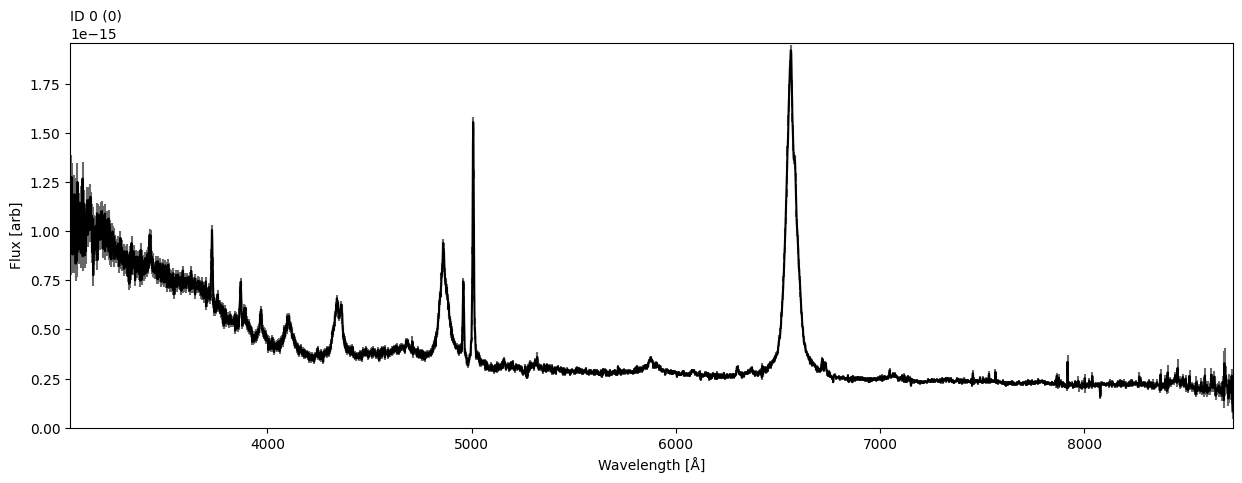

In [23]:
sheapspectral.quicklook(0)

In [24]:
# sheapspectral.result.fitting_routine

In [ ]:
sheapspectral.build_region(3500,7800,n_broad=1,group_method=True,fe_mode ="template",continuum_profile="polynomial",add_winds=False,add_outflow=True)

continuum_profile: polynom not recognized moving to powerlaw, the current available are ['linear', 'powerlaw', 'brokenpowerlaw', 'logparabola', 'exp_cutoff', 'polynomial']
added OP template


In [75]:
# sheapspectral.build_region(4000,7800,n_broad=1,group_method=True,fe_mode ="none",continuum_profile="linear",add_winds=False,add_outflow=True)

In [76]:
sheapspectral.builded_region.complex_class.group_by("region")["outflow"]

ComplexRegion(lines=[SpectralLine(line_name='outflow10', center=[4958.896072, 5006.803341], region='outflow', component=10, subregion=[None, None], amplitude=[0.5], element=['Oxygen', 'Oxygen'], how=None, profile='SPAF', which_template=None, region_lines=['OIIIb', 'OIIIc'], amplitude_relations=[(0, 0.3, 1), (1, 1.0, 1)], subprofile=None, rarity=None)], profile_functions=[], profile_names=[], params_dict={}, profile_params_index_list=[], params=None, uncertainty_params=None, original_idx=[4], _master_param_names=[], global_profile_params_index_list=[])

In [80]:
sheapspectral.result.constraints

Array([[   0.        ,    2.        ],
       [   0.        ,    2.        ],
       [   0.        ,    2.        ],
       [   0.        ,    2.        ],
       [   0.        ,    2.        ],
       [   0.        ,    2.        ],
       [   0.        ,    2.        ],
       [   0.        ,    2.        ],
       [   0.        ,    2.        ],
       [   0.        ,    2.        ],
       [   0.        ,    2.        ],
       [   0.        ,    2.        ],
       [   0.        ,    2.        ],
       [   0.        ,    2.        ],
       [   0.        ,    2.        ],
       [   0.        ,    2.        ],
       [   0.        ,    2.        ],
       [-162.14550781,  162.14550781],
       [  16.22873878,  162.14550781],
       [   0.        ,   10.        ],
       [   0.        ,   10.        ],
       [   0.        ,   10.        ],
       [   0.        ,   10.        ],
       [   0.        ,   10.        ],
       [   2.70000005,    3.79999995],
       [ -50.        ,   

In [77]:
# sheapspectral.builded_region.complex_class.group_by("region")

In [78]:
import optax

# # 1) Define your learning‐rate schedule:
schedule = optax.join_schedules(
    schedules=[optax.constant_schedule(1e-2),
        optax.constant_schedule(1e-3),   # 0 ≤ step < 2000
       #optax.constant_schedule(1e-3),   # step ≥ 2000
    ],
    boundaries=[6_000],
)

sheapspectral.fit_region(list_num_steps=[10_000],list_learning_rate=[1e-2],run_uncertainty_params=False)

Fitting 2 spectra with 4590 wavelength pixels

STEP1 (step 1) free params 53
learning_rate: 0.01 num_steps: 10000 non_optimize_in_axis: 4
Time for step 'step1': 25.86 seconds
The entire process took 25.86 (12.93s by spectra)


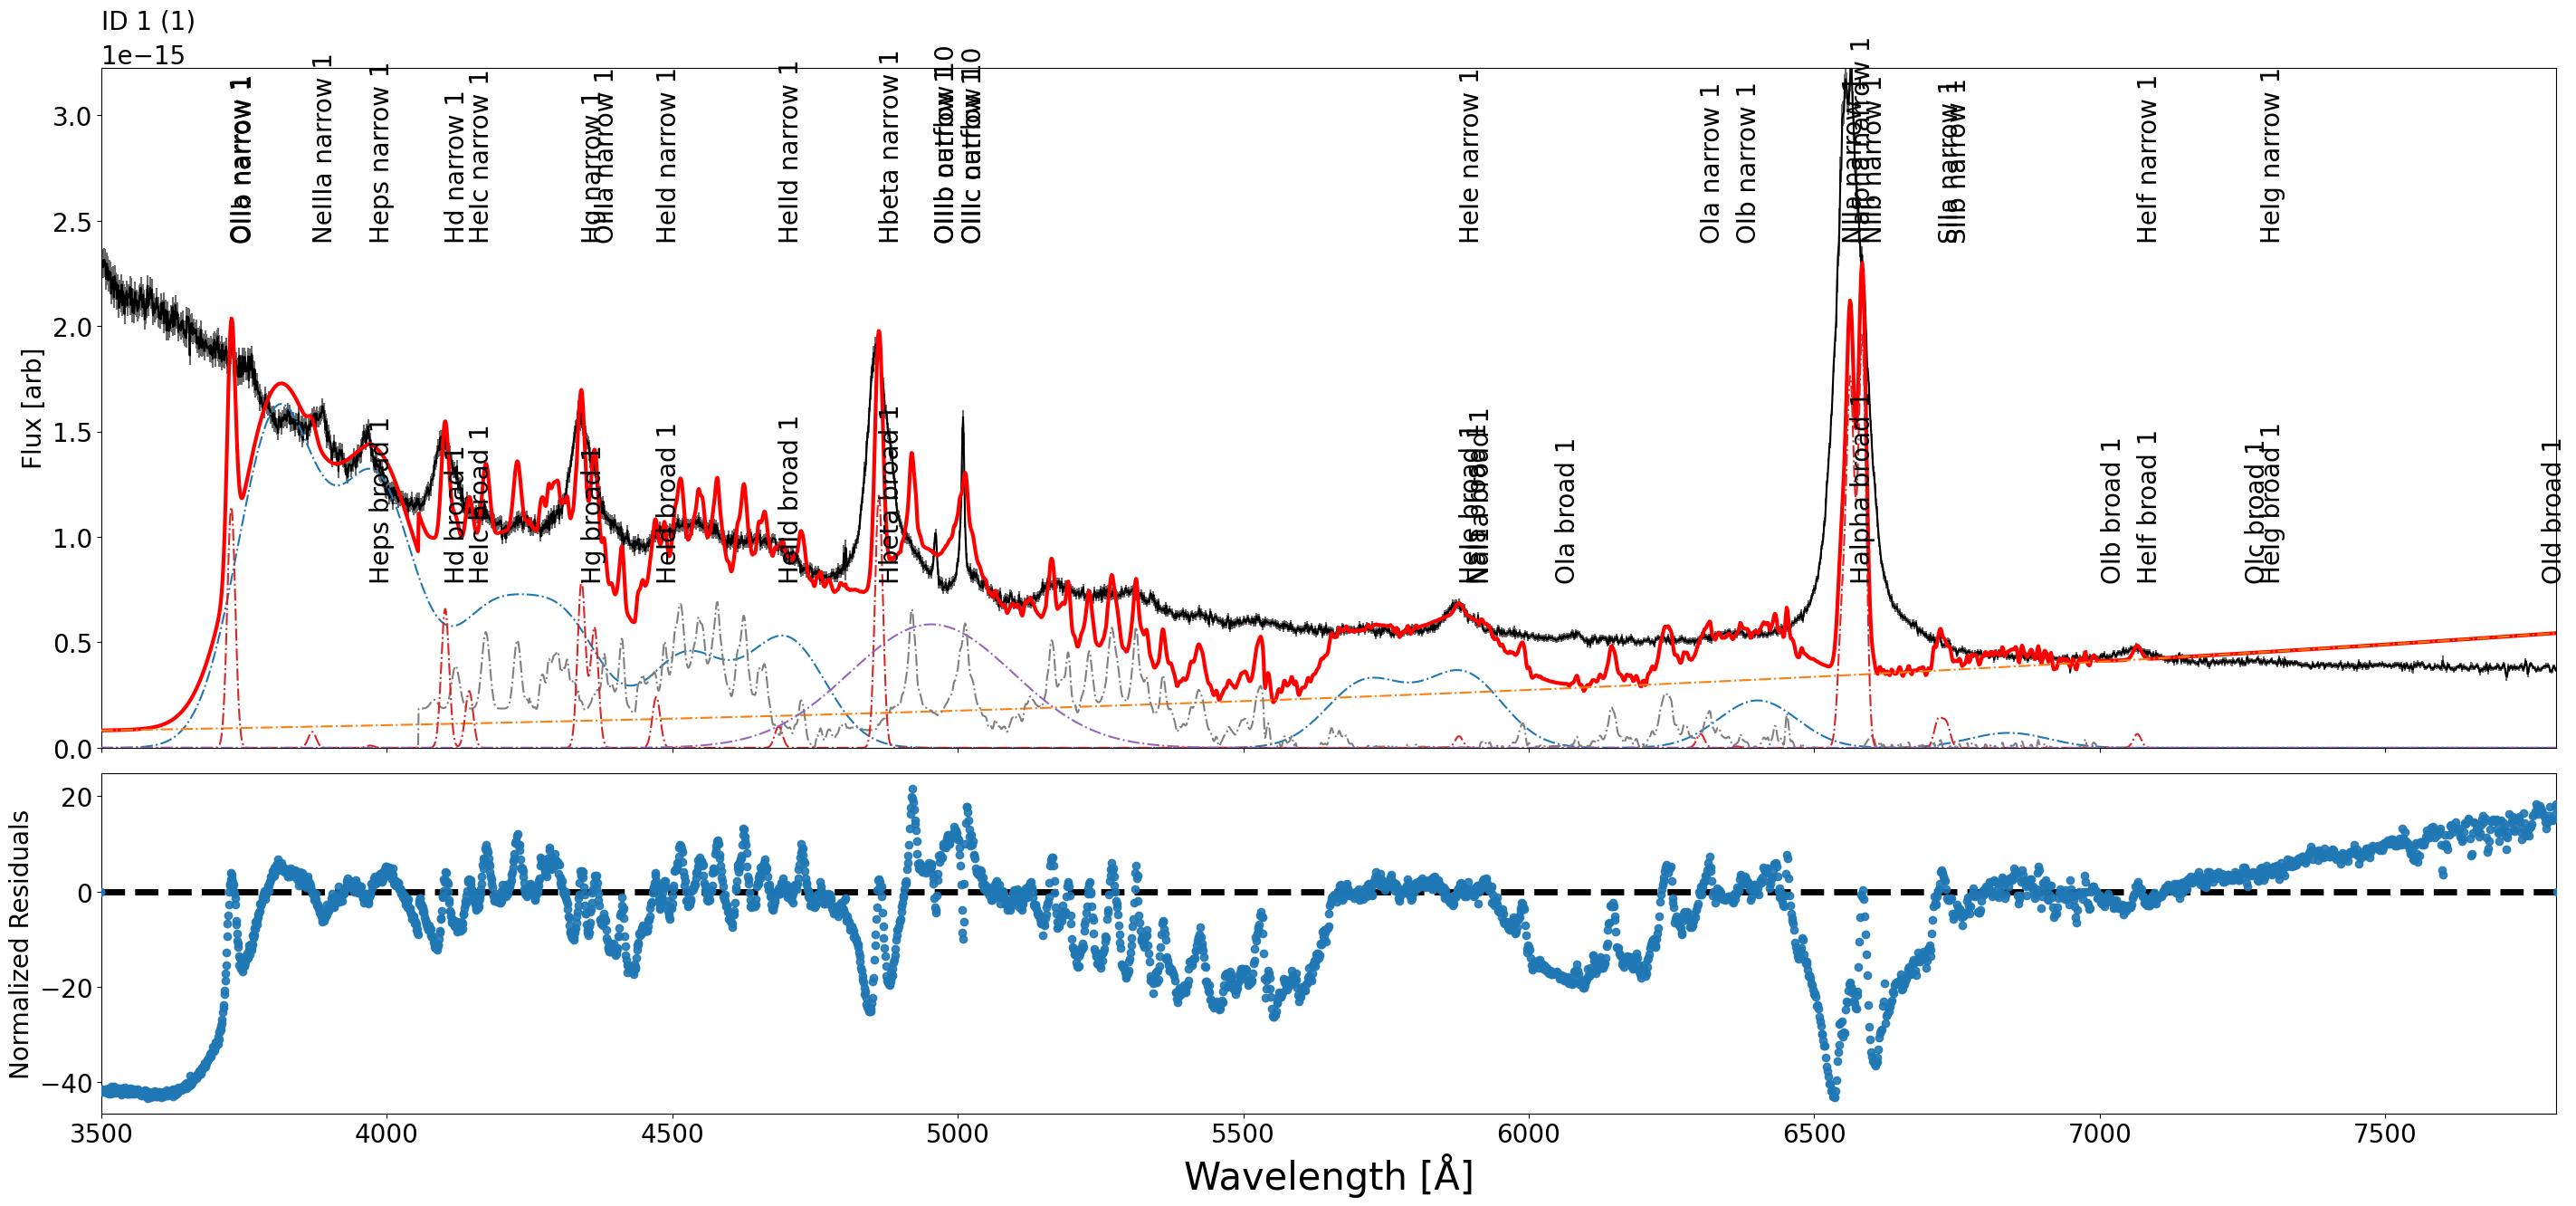

In [79]:
sheapspectral._plotter.plot(1,add_name=True)

In [44]:
sheapspectral.result.constraints

Array([[ 0.00000000e+00,  2.00000000e+00],
       [ 0.00000000e+00,  2.00000000e+00],
       [ 0.00000000e+00,  2.00000000e+00],
       [ 0.00000000e+00,  2.00000000e+00],
       [ 0.00000000e+00,  2.00000000e+00],
       [ 0.00000000e+00,  2.00000000e+00],
       [ 0.00000000e+00,  2.00000000e+00],
       [ 0.00000000e+00,  2.00000000e+00],
       [ 0.00000000e+00,  2.00000000e+00],
       [ 0.00000000e+00,  2.00000000e+00],
       [ 0.00000000e+00,  2.00000000e+00],
       [ 0.00000000e+00,  2.00000000e+00],
       [ 0.00000000e+00,  2.00000000e+00],
       [ 0.00000000e+00,  2.00000000e+00],
       [ 0.00000000e+00,  2.00000000e+00],
       [ 0.00000000e+00,  2.00000000e+00],
       [-1.62145508e+02,  1.62145508e+02],
       [ 1.62287388e+01,  1.62145508e+02],
       [ 0.00000000e+00,  1.00000000e+01],
       [-3.00000000e+00,  0.00000000e+00],
       [-1.00000000e+00,  1.00000000e+00],
       [ 4.00000000e+03,  7.00000000e+03],
       [ 0.00000000e+00,  2.00000000e+00],
       [-1.

In [ ]:
sheapspectral.posterior_params(run="montecarlo",overwrite=True)

The mcmc will be runend for all the sample
No dependencies
Runing MCMC object 0


sample:  49%|████▊     | 1215/2500 [1:27:31<1:32:34,  4.32s/it, 255 steps of size 9.72e-03. acc. prob=0.94] 


KeyboardInterrupt: 

In [36]:
sheapspectral.result.posterior

In [34]:
sheapspectral.save_to_pickle("dic1.pkl")

Estimated pickle size: 281.75 KB


In [37]:
sheapspectral.result.profile_functions

[<function sheap.Functions.profiles.SPAF.<locals>.G(x, params)>,
 <function sheap.Functions.continuum_profiles.brokenpowerlaw(xs: jax.Array, params: jax.Array) -> jax.Array>,
 <function sheap.Functions.profiles.SPAF.<locals>.G(x, params)>,
 <function sheap.Functions.profiles.SPAF.<locals>.G(x, params)>,
 <function sheap.Functions.profiles.SPAF.<locals>.G(x, params)>,
 <function sheap.Functions.profiles.SPAF.<locals>.G(x, params)>,
 <function sheap.Functions.profiles.SPAF.<locals>.G(x, params)>,
 <function sheap.Functions.profiles.SPAF.<locals>.G(x, params)>,
 <function sheap.Functions.profiles.SPAF.<locals>.G(x, params)>,
 <function sheap.Functions.profiles.SPAF.<locals>.G(x, params)>,
 <function sheap.Functions.profiles.SPAF.<locals>.G(x, params)>,
 <function sheap.Functions.profiles.SPAF.<locals>.G(x, params)>,
 <function sheap.Functions.profiles.SPAF.<locals>.G(x, params)>,
 <function sheap.Functions.profiles.SPAF.<locals>.G(x, params)>,
 <function sheap.Functions.profiles.SPAF.<loc

In [38]:
sheapspectralv2 = Sheapectral.from_pickle("dic1.pkl")

In [43]:
sheapspectralv2.posterior_params(run_montecarlo=True,overwrite=True)

The samples will be summarize is you want to keep the samples summarize=False
No dependencies


Sampling obj:   0%|          | 0/2 [00:00<?, ?it/s]

Sampling obj:   0%|          | 0/2 [00:13<?, ?it/s]


XlaRuntimeError: RESOURCE_EXHAUSTED: /tmp/tempfile-biggie-fb8f4f57-190524-639a51882af17; No space left on device
	Unable to write PTX contents to: /tmp/tempfile-biggie-fb8f4f57-190524-639a51882af17

{'montecarlo': {np.str_('0'): {'basic_params': {'broad': {'lines': ['Hd',
      'HeIc',
      'Hg',
      'HeId',
      'HeIId',
      'Hbeta',
      'HeIe',
      'Halpha',
      'HeIf',
      'HeIg',
      'NaIa',
      'NaI1a',
      'OIa',
      'OIb',
      'OIc',
      'OId'],
     'component': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
     'flux': {'median': array([7.75121230e-15, 5.42666507e-18, 1.27388418e-14, 9.95023442e-16,
             5.76792986e-15, 2.83293452e-14, 3.10692821e-15, 9.09162980e-14,
             1.26861601e-15, 9.83139974e-17, 3.98727062e-16, 5.25175059e-16,
             1.69052663e-16, 1.93648610e-16, 6.70915985e-18, 1.80399696e-16]),
      'err_minus': array([4.29152986e-16, 3.38499473e-16, 4.63934356e-16, 5.03457797e-16,
             3.44132472e-16, 3.82026760e-16, 1.38304257e-15, 5.53783775e-16,
             2.18880258e-16, 2.87785183e-16, 4.40034560e-15, 2.98987450e-15,
             1.99945707e-16, 2.06665178e-16, 2.61108923e-16, 2.07205270e-16]

In [74]:
sheapspectralv2.result.complex_class?

Type:        ComplexRegion
String form:
ComplexRegion(lines=[SpectralLine(line_name='broad1', center=[4101.742, 4143.761, 4340.471, 4471. <...> 2, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
           87, 88]), array([89, 90, 91])])
File:        /home/favila/smbh_mass/sheap/sheap/DataClass/ComplexRegion.py
Docstring:  
Holds SpectralLines + (optionally) their profile functions & parameters.
You can slice/filter/group arbitrarily, and still recover both the
original (“global”) and per‐subset (“local”) parameter mappings.

In [ ]:
# def profile_reader():
from sheap.Functions.profiles import PROFILE_FUNC_MAP
profile_functions = []
for _,sp in enumerate(sheapspectralv2.complex_region):
    holder_profile = getattr(sp, "profile") # cant be none 
    if "SPAF" in holder_profile:
        if len(sp.profile.split("_")) == 2:
            profile, subprofile = sp.profile.split("_")
        else:
            print("Warning this if u have an SPAF, you should have and subprofile otherwise it can be readed correctly")
        sm = PROFILE_FUNC_MAP["SPAF"](sp.center,sp.amplitude_relations,subprofile)
        profile_functions.append(sm)
    else:
        profile_functions.append(PROFILE_FUNC_MAP.get(holder_profile))

In [40]:
sheapspectralv2.result.profile_names

['SPAF_gaussian',
 'brokenpowerlaw',
 'SPAF_gaussian',
 'SPAF_gaussian',
 'SPAF_gaussian',
 'SPAF_gaussian',
 'SPAF_gaussian',
 'SPAF_gaussian',
 'SPAF_gaussian',
 'SPAF_gaussian',
 'SPAF_gaussian',
 'SPAF_gaussian',
 'SPAF_gaussian',
 'SPAF_gaussian',
 'SPAF_gaussian',
 'SPAF_gaussian',
 'SPAF_gaussian',
 'SPAF_gaussian',
 'SPAF_gaussian',
 'SPAF_gaussian']

In [97]:
# from sheap.Functions.utils import make_fused_profiles
# from jax import jit 

# model = jit(make_fused_profiles(profile_functions))

In [96]:
# sheapspectralv2.spectra[0,1,:]

In [95]:
# import matplotlib.pyplot as plt 
# plt.plot(sheapspectralv2.spectra[0,0,:],model(sheapspectralv2.spectra[0,0,:],sheapspectralv2.result.params[0]))
# plt.plot(sheapspectralv2.spectra[0,0,:],sheapspectralv2.spectra[0,1,:])
# plt.xlim(*sheapspectralv2.result.outer_limits)

In [98]:
# sheapspectralv2.result.dependencies

In [85]:
from sheap.Posterior.ParameterEstimation import ParameterEstimation

PM = ParameterEstimation(sheapspectralv2)
matrix_sample_params,dic_posterior_params = PM.sample_montecarlo()


The samples will be summarize is you want to keep the samples summarize=False
No dependencies


Sampling obj:  50%|█████     | 1/2 [01:15<01:15, 75.89s/it]/home/favila/smbh_mass/sheap/sheap/Posterior/functions.py:33: RuntimeWarning: invalid value encountered in log10
  log_L = np.log10(L_w)
/home/favila/smbh_mass/sheap/sheap/Posterior/posterior_v2.py:22: UserWarning: High fraction of NaNs; uncertainty estimates may be biased.
  warnings.warn("High fraction of NaNs; uncertainty estimates may be biased.")
Sampling obj: 100%|██████████| 2/2 [01:18<00:00, 39.04s/it]


In [90]:
dic_posterior_params

{np.str_('0'): {'basic_params': {'broad': {'lines': ['Hd',
     'HeIc',
     'Hg',
     'HeId',
     'HeIId',
     'Hbeta',
     'HeIe',
     'Halpha',
     'HeIf',
     'HeIg',
     'NaIa',
     'NaI1a',
     'OIa',
     'OIb',
     'OIc',
     'OId'],
    'component': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    'flux': {'median': array([7.75121230e-15, 5.42666507e-18, 1.27388418e-14, 9.95023442e-16,
            5.76792986e-15, 2.83293452e-14, 3.10692821e-15, 9.09162980e-14,
            1.26861601e-15, 9.83139974e-17, 3.98727062e-16, 5.25175059e-16,
            1.69052663e-16, 1.93648610e-16, 6.70915985e-18, 1.80399696e-16]),
     'err_minus': array([4.29152986e-16, 3.38499473e-16, 4.63934356e-16, 5.03457797e-16,
            3.44132472e-16, 3.82026760e-16, 1.38304257e-15, 5.53783775e-16,
            2.18880258e-16, 2.87785183e-16, 4.40034560e-15, 2.98987450e-15,
            1.99945707e-16, 2.06665178e-16, 2.61108923e-16, 2.07205270e-16]),
     'err_plus': array([4.00511211e-

In [100]:
sheapspectral.result_dict(1)

{'amplitude0_broad1_1_broad': [3.913530179633487e-16,
  0.0,
  Array([0., 2.], dtype=float64)],
 'amplitude1_broad1_1_broad': [4.494239772074641e-19,
  0.0,
  Array([0., 2.], dtype=float64)],
 'amplitude2_broad1_1_broad': [4.741198100828982e-16,
  0.0,
  Array([0., 2.], dtype=float64)],
 'amplitude3_broad1_1_broad': [5.607137356997493e-19,
  0.0,
  Array([0., 2.], dtype=float64)],
 'amplitude4_broad1_1_broad': [2.2157470016265218e-16,
  0.0,
  Array([0., 2.], dtype=float64)],
 'amplitude5_broad1_1_broad': [8.965418112630774e-16,
  0.0,
  Array([0., 2.], dtype=float64)],
 'amplitude6_broad1_1_broad': [1.7358896021171599e-16,
  0.0,
  Array([0., 2.], dtype=float64)],
 'amplitude7_broad1_1_broad': [2.365599332564204e-15,
  0.0,
  Array([0., 2.], dtype=float64)],
 'amplitude8_broad1_1_broad': [4.95144292799383e-17,
  0.0,
  Array([0., 2.], dtype=float64)],
 'amplitude9_broad1_1_broad': [3.496477973600928e-18,
  0.0,
  Array([0., 2.], dtype=float64)],
 'amplitude10_broad1_1_broad': [3.64054

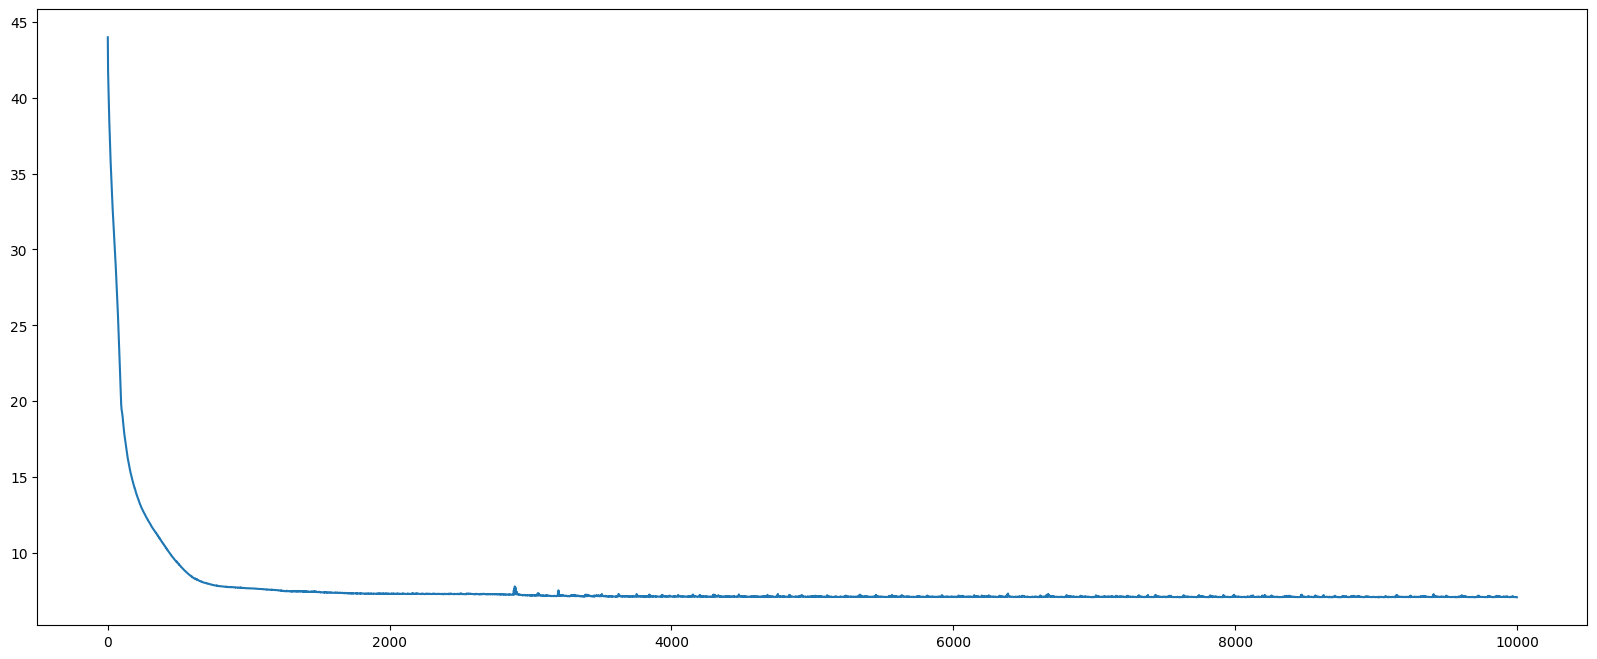

In [101]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,8))
plt.plot(sheapspectral.result.loss[0])

In [102]:
from sheap.Functions.template_func import fe_template_OP

In [103]:
#sheapspectral.result.profile_functions

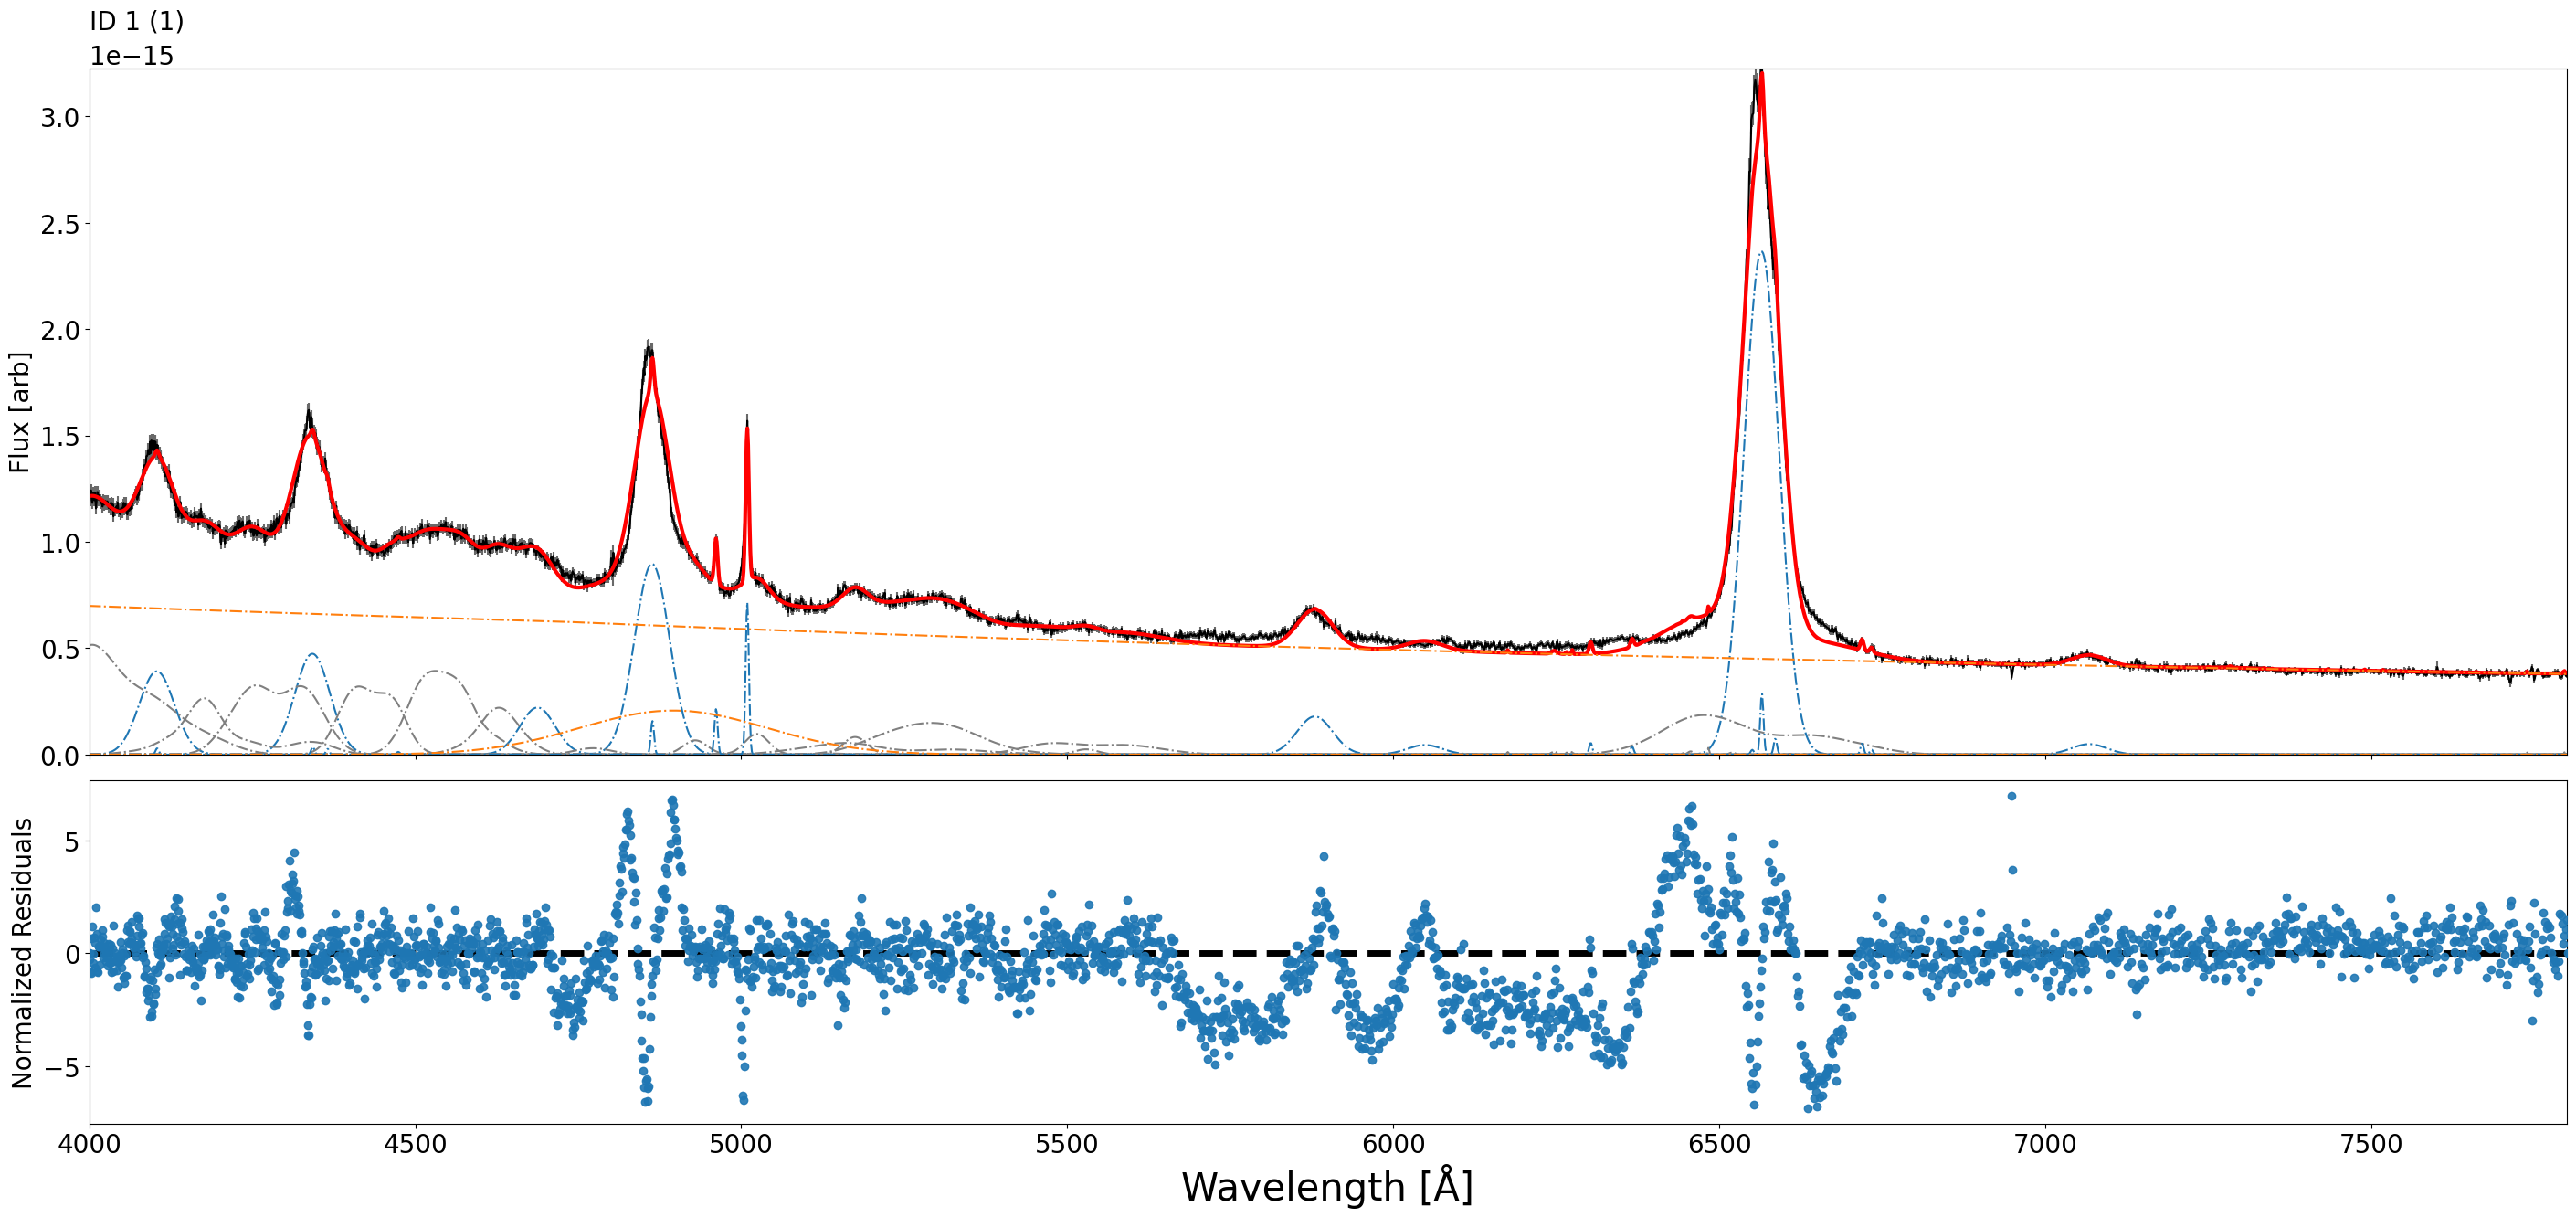

In [ ]:
sheapspectral._plotter.plot(1,add_name=False)

In [ ]:
params = Parameters()

In [64]:
# sp = SheapPlot(sheapspectral)

In [24]:
# sheapspectral.quicklook(1)

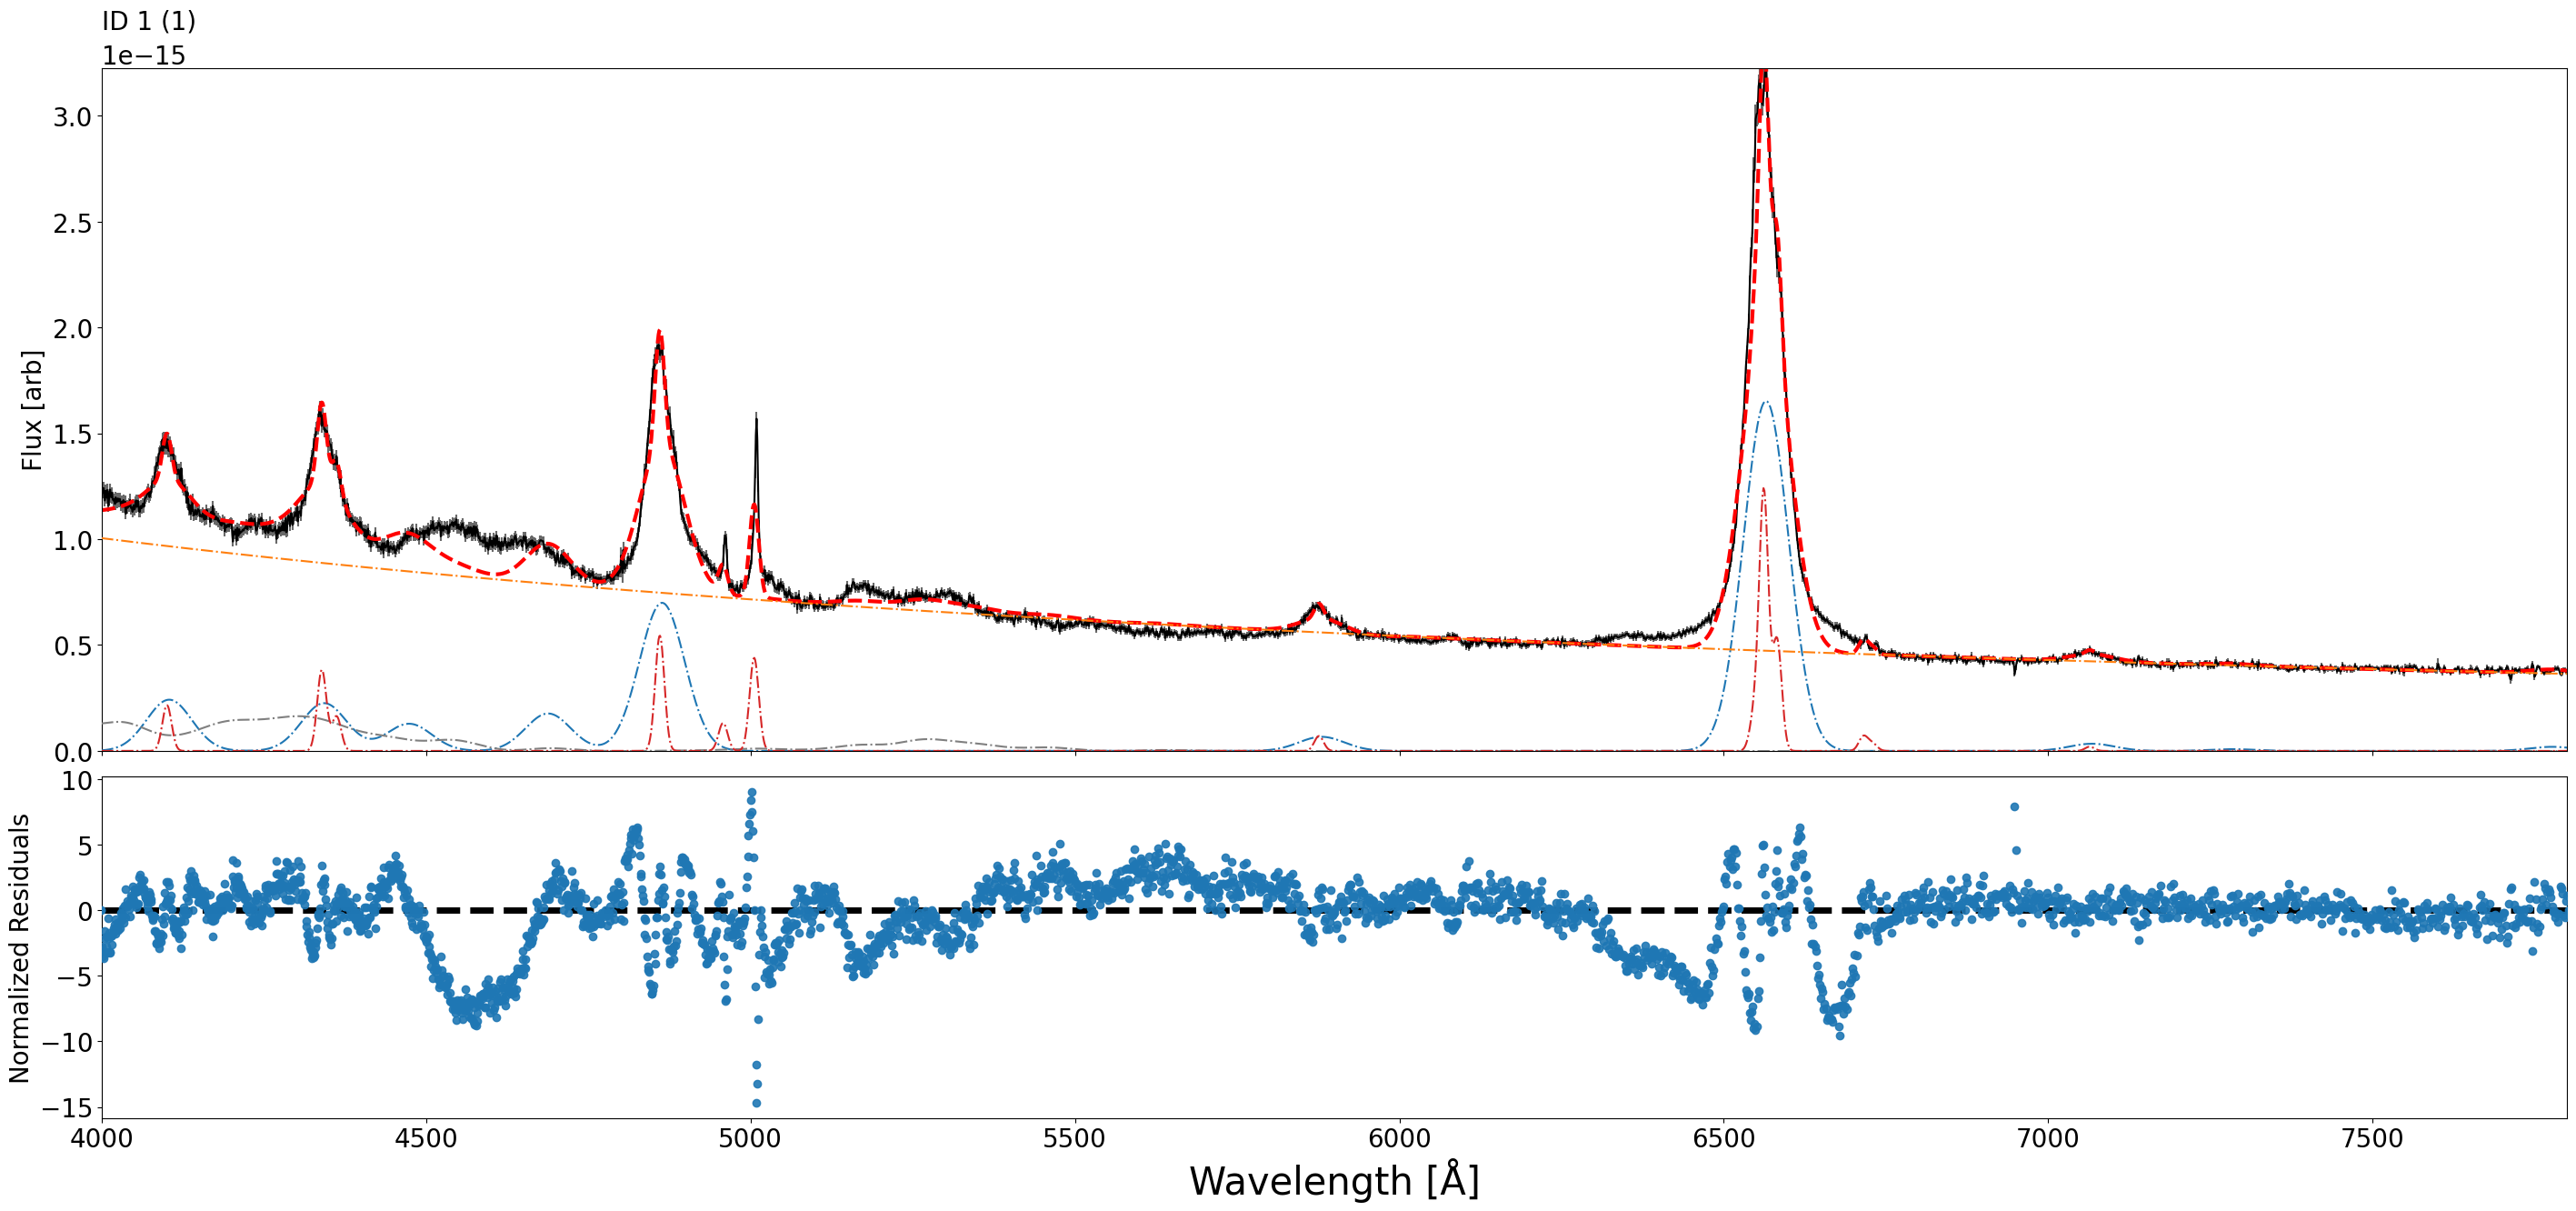

In [170]:
params = Parameters()

for name, idx in sheapspectral.fitting_class.params_dict.items():
    val = sheapspectral.fitting_class.initial_params[idx]  # Use one object's value as a starting point
    min,max = sheapspectral.fitting_class.constraints[idx]
    params.add(name, val, min=min, max=max)

NameError: name 'Parameters' is not defined

In [ ]:
phys_params = params.raw_to_phys(sheapspectral.fitting_class.params)

In [ ]:
phys_params

Array([[   0.5      ,    0.5      ,    0.5      ,    0.5      ,
           0.5      ,    0.5      ,    0.5      ,    0.5      ,
           0.5      ,   76.08699  ,  190.92633  ,   -2.6014261,
           5.       ,    3.7971663, -100.       ,   49.655533 ,
           0.5      ,    0.5      ,    0.5      ,    0.5      ,
           0.5      ,    0.5      ,    0.5      ,    0.5      ,
           0.5      ,    0.5      ,    0.5      ,    0.5      ,
           0.5      ,   17.808556 ,    7.865132 ],
       [   0.5      ,    0.5      ,    0.5      ,    0.5      ,
           0.5      ,    0.5      ,    0.5      ,    0.5      ,
           0.5      ,   77.428925 ,  190.92633  ,   -2.5980654,
           5.       ,    3.7973547,  -99.986435 ,   49.100533 ,
           0.5      ,    0.5      ,    0.5      ,    0.5      ,
           0.5      ,    0.5      ,    0.5      ,    0.5      ,
           0.5      ,    0.5      ,    0.5      ,    0.5      ,
           0.5      ,   -9.051502 ,    4.9291987]], d

Array([[ 1.58561603e-16,  1.38109768e-16, -1.55659284e-16,
        -2.74881299e-17, -1.04324595e-16,  2.31330945e-16,
         2.57623599e-17,  1.39664152e-16,  5.85176470e-16,
         3.45067763e+00,  4.50880508e+01, -1.39075673e+00,
         5.08763267e-15,  5.95894194e+00, -2.03360023e+01,
        -1.37789818e-02,  1.99671302e-16,  1.25727761e-16,
         7.75931347e-17,  1.52648530e-15,  1.17533762e-15,
        -7.60239069e-17, -1.07323230e-16,  2.47048197e-16,
         1.59389207e-16,  9.57811026e-17, -3.31793956e-17,
        -2.81120276e-17, -9.26059864e-17,  9.11251903e-01,
         8.42001152e+00],
       [ 6.75656530e-16,  5.01727684e-16, -4.41372405e-16,
        -2.12986488e-16, -4.39302150e-16,  3.89515698e-16,
        -7.50782939e-17,  4.14507517e-17,  1.19752184e-15,
         3.77272916e+00,  4.10511169e+01, -1.38025951e+00,
         1.59232250e-14,  6.02795410e+00, -9.59849072e+00,
        -3.59825157e-02,  2.01976912e-15,  3.37101262e-15,
         1.62706167e-15,  4.38

In [ ]:
import jax
import jax.numpy as jnp
import math
from typing import List, Optional, Tuple, Dict, Union

class Parameter:
    def __init__(
        self,
        name: str,
        value: float,
        *,
        min: float = -jnp.inf,
        max: float = jnp.inf,
        tie: Optional[Tuple[str, str, str, float]] = None
    ):
        self.name = name
        self.value = float(value)
        self.min = float(min)
        self.max = float(max)
        self.tie = tie  # Format: ("target", "source", "*", 2.0)

class Parameters:
    def __init__(self):
        self._list: List[Parameter] = []

    def add(
        self,
        name: str,
        value: float,
        *,
        min: Optional[float] = None,
        max: Optional[float] = None,
        tie: Optional[Tuple[str, str, str, float]] = None,
    ):
        lo = -jnp.inf if min is None else min
        hi = jnp.inf if max is None else max
        self._list.append(Parameter(name, value, min=lo, max=hi, tie=tie))

    @property
    def names(self) -> List[str]:
        return [p.name for p in self._list]

    def _split_params(self) -> Tuple[List[Parameter], List[Parameter]]:
        raw = [p for p in self._list if p.tie is None]
        tied = [p for p in self._list if p.tie is not None]
        return raw, tied

    def raw_init(self) -> jnp.ndarray:
        raw, _ = self._split_params()
        eps = 1e-6
        inits = []
        for p in raw:
            if math.isfinite(p.min) or math.isfinite(p.max):
                frac = (p.value - p.min) / (p.max - p.min)
                frac = max(min(frac, 1.0 - eps), eps)
                inits.append(math.log(frac / (1.0 - frac)))
            else:
                inits.append(math.log(p.value) if p.value > 0 else 0.0)
        return jnp.array(inits)

    def raw_to_phys(self, raw_params: jax.Array) -> jax.Array:
        def single_convert(raw):
            raw_list, tied_list = self._split_params()
            ctx: Dict[str, jnp.ndarray] = {}
            idx = 0

            # 1. Free → physical
            for p in raw_list:
                r = raw[idx]
                if math.isfinite(p.min) or math.isfinite(p.max):
                    val = p.min + (p.max - p.min) * jax.nn.sigmoid(r)
                else:
                    val = jnp.exp(r)
                ctx[p.name] = val
                idx += 1

            # 2. Tied → apply operation
            op_map = {
                "*": jnp.multiply,
                "+": jnp.add,
                "-": jnp.subtract,
                "/": jnp.divide,
            }
            for p in tied_list:
                target, source, op, operand = p.tie
                ctx[p.name] = op_map[op](ctx[source], operand)

            return jnp.stack([ctx[p.name] for p in self._list])

        if raw_params.ndim == 1:
            return single_convert(raw_params)
        return jax.vmap(single_convert)(raw_params)


Fitting 2 spectra with 4590 wavelength pixels

STEP1 (step 1) free params 31
learning_rate: 0.1 num_steps: 1000 non_optimize_in_axis: 4
Time for step 'step1': 7.74 seconds
The entire process took 7.74 (3.87s by spectra)


<Axes: xlabel='Wavelength [Å]', ylabel='Flux [arb]'>

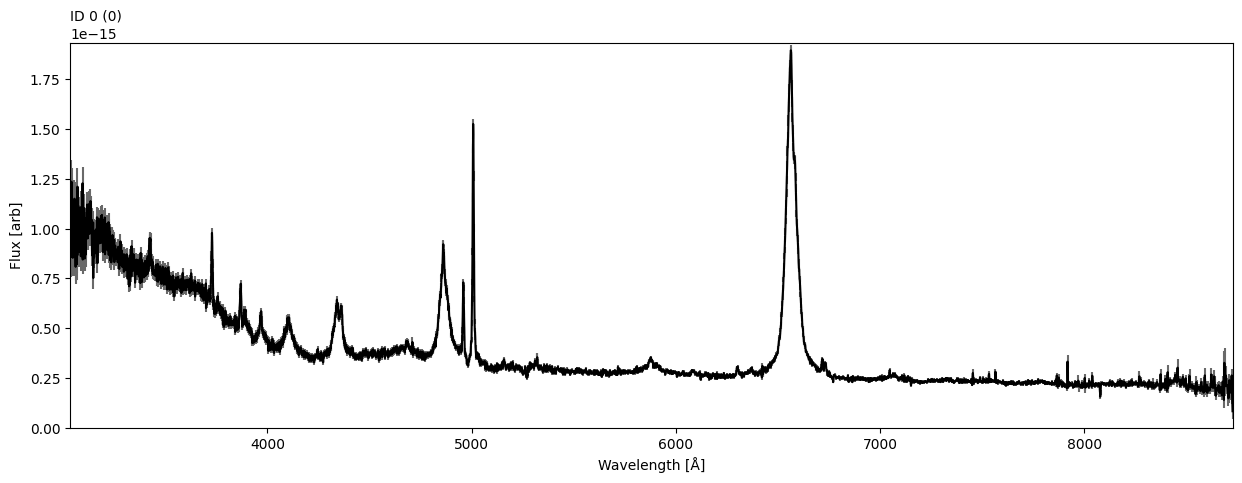

In [ ]:
sheapspectral.quicklook(0)

In [ ]:
sheapspectral.build_region(3000,7200,n_broad=1,grouped_method=True,fe_mode = "template",continuum_profile="brokenpowerlaw")

added OP template


In [ ]:
sheapspectral.fit_region(learning_rate=[1,1e-2],num_steps_list=[100,3000],sigma_params=False)

Fitting 2 spectra with 4590 wavelength pixels

STEP1 (step 1) free params 49
learning_rate: 1 num_steps: 100 non_optimize_in_axis: 4


Time for step 'step1': 13.00 seconds

STEP2 (step 2) free params 49
learning_rate: 0.01 num_steps: 3000 non_optimize_in_axis: 4
Time for step 'step2': 11.84 seconds
The entire process took 24.84 (12.42s by spectra)


In [ ]:
sheapspectral.result.params_dict

{'logFWHM_feop_21_fe': 0,
 'shift_feop_21_fe': 1,
 'scale_feop_21_fe': 2,
 'index1_brokenpowerlaw_0_continuum': 3,
 'index2_brokenpowerlaw_0_continuum': 4,
 'scale_brokenpowerlaw_0_continuum': 5,
 'refer_brokenpowerlaw_0_continuum': 6,
 'amplitude0_broad1_1_broad': 7,
 'amplitude1_broad1_1_broad': 8,
 'amplitude2_broad1_1_broad': 9,
 'amplitude3_broad1_1_broad': 10,
 'amplitude4_broad1_1_broad': 11,
 'amplitude5_broad1_1_broad': 12,
 'amplitude6_broad1_1_broad': 13,
 'amplitude7_broad1_1_broad': 14,
 'amplitude8_broad1_1_broad': 15,
 'amplitude9_broad1_1_broad': 16,
 'amplitude10_broad1_1_broad': 17,
 'amplitude11_broad1_1_broad': 18,
 'amplitude12_broad1_1_broad': 19,
 'amplitude13_broad1_1_broad': 20,
 'amplitude14_broad1_1_broad': 21,
 'amplitude15_broad1_1_broad': 22,
 'shift_broad1_1_broad': 23,
 'fwhm_broad1_1_broad': 24,
 'amplitude0_narrow1_1_narrow': 25,
 'amplitude1_narrow1_1_narrow': 26,
 'amplitude2_narrow1_1_narrow': 27,
 'amplitude3_narrow1_1_narrow': 28,
 'amplitude4_nar

In [ ]:
sp = SheapPlot(sheapspectral)

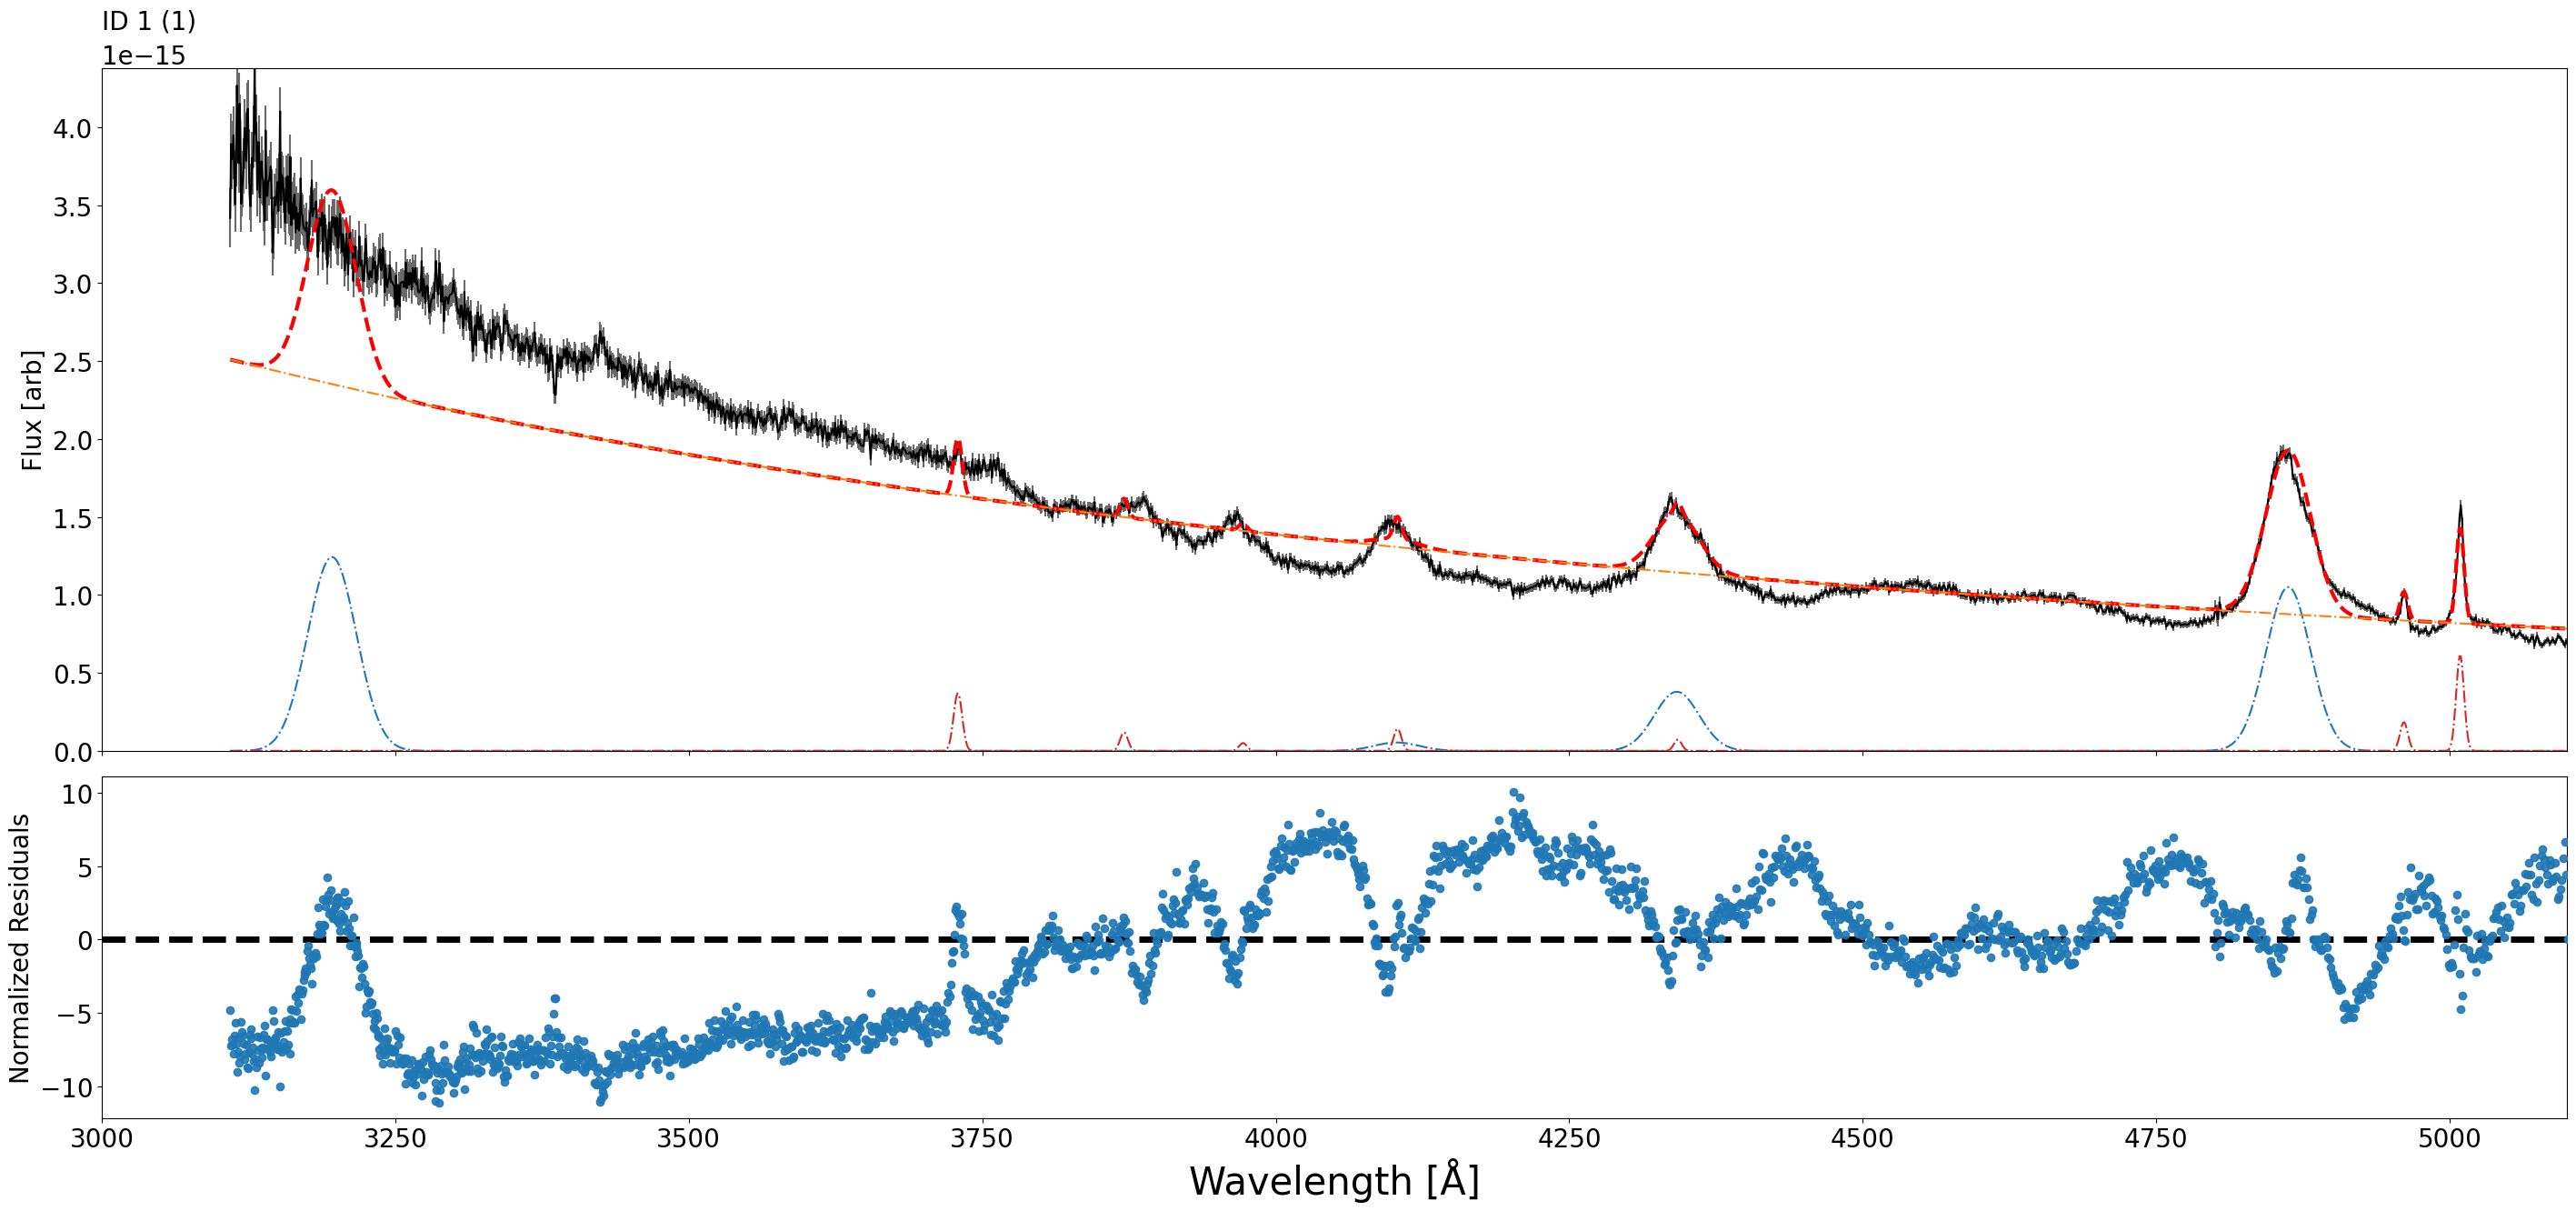

In [ ]:
import matplotlib.pyplot as plt

# extract wavelength and flux for the first object
wavelength = sheapspectral.spectra[0, 0, :]  # pixel wavelengths :contentReference[oaicite:0]{index=0}
flux       = sheapspectral.spectra[0, 1, :]  # corresponding fluxes :contentReference[oaicite:1]{index=1}

plt.figure(figsize=(20, 10))
plt.plot(wavelength, flux, color='black', linewidth=1)

# get current y‐limits so we can place labels at the top
ymin, ymax = plt.ylim()

# overlay each line center
for line in sheapspectral.complex_region:
    center = line.center        # wavelength center of this component :contentReference[oaicite:2]{index=2}
    name   = line.line_name     # human‐readable label :contentReference[oaicite:3]{index=3}

    # skip entries without a defined center
    if center is None:
        continue

    # draw dashed red line
    plt.axvline(center, color='red', linestyle='--', linewidth=0.8)

    # annotate at 98% of the top of the plot, rotated vertical
    plt.text(
        center,
        ymax * 0.98,
        name,
        rotation=90,
        verticalalignment='top',
        horizontalalignment='center',
        fontsize=9,
        color='red'
    )

# final plot cosmetics
plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux [arb]")
plt.title(f"Spectrum ({sheapspectral.names[0]}) with Emission Line Centers")
plt.tight_layout()
plt.show()
